<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj12-human-stress-detection?scriptVersionId=191692467" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Human Stress Detection</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

Human stress detection is an important area of research, especially in the field of wearable technology and healthcare. This dataset focuses on detecting and analyzing human stress levels based on physiological data collected from wearable devices. The dataset is designed to classify stress levels into three categories: low stress, normal stress, and high stress.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report , f1_score, roc_auc_score, confusion_matrix

In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download laavanya/stress-level-detection -f  Stress-Lysis.csv

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/laavanya/stress-level-detection
License(s): copyright-authors
  0%|                                               | 0.00/35.6k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 35.6k/35.6k [00:00<00:00, 3.79MB/s]


In [4]:
data = pd.read_csv("Stress-Lysis.csv").copy()

# **Take a look at the data**
---

In [5]:
data.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [7]:
data.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [8]:
#data.select_dtypes(include=['object']).describe()

In [9]:
data['Stress Level'].value_counts()

Stress Level
1    790
2    710
0    501
Name: count, dtype: int64

# **Exploratory Data Analysis**
---

**Univariate Analysis**

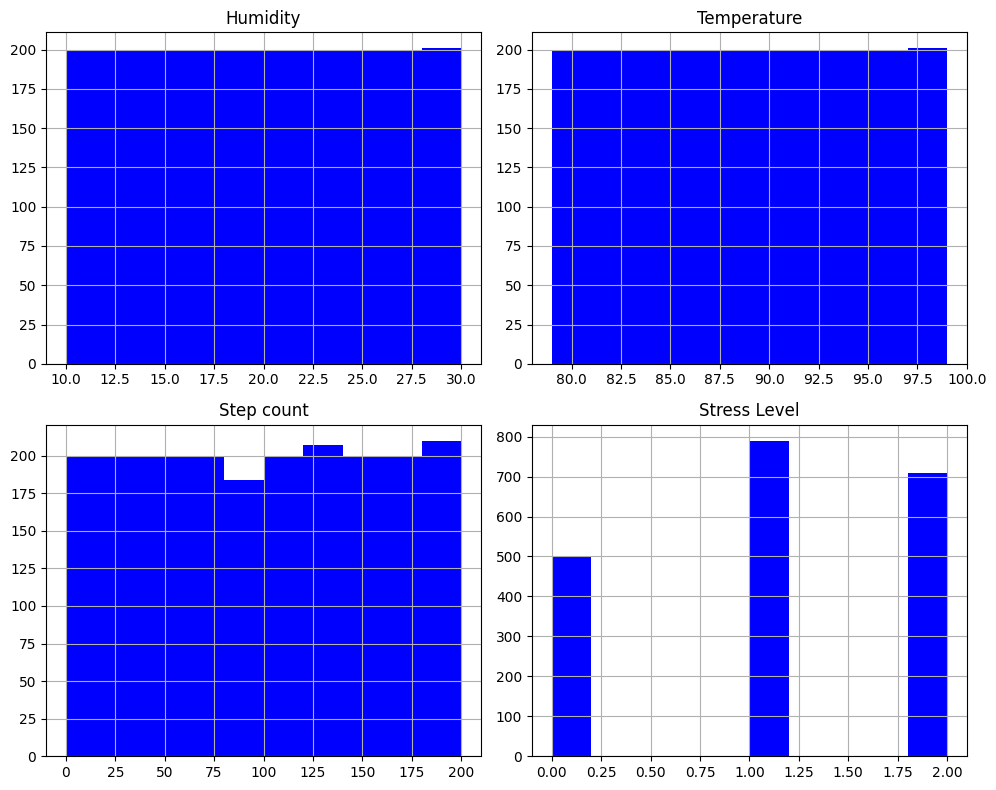

In [10]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

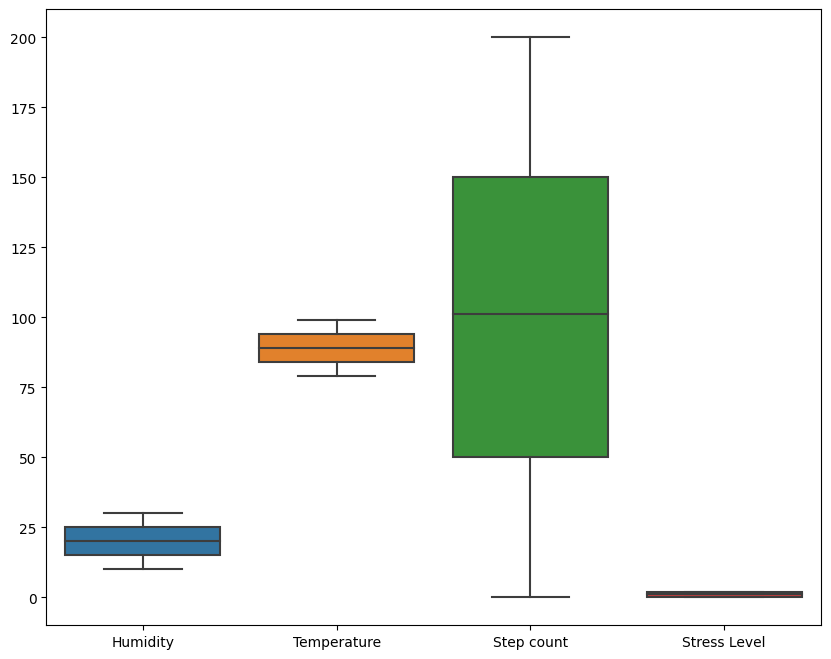

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

**Multivariate Analysis**

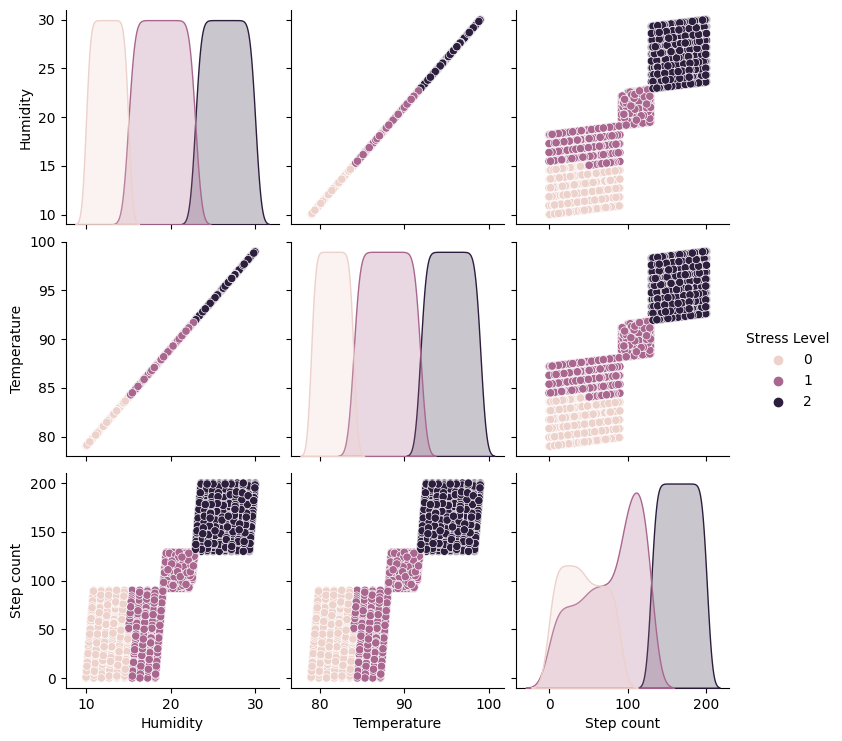

In [12]:
sns.pairplot(data, hue='Stress Level')

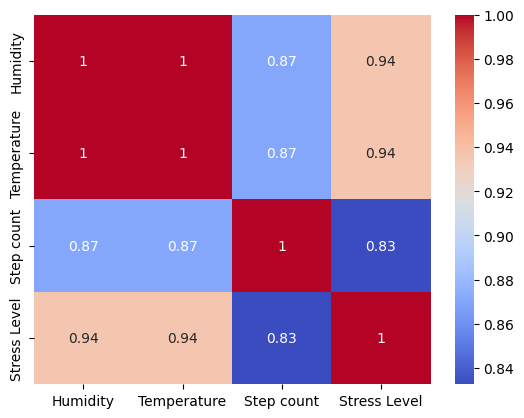

In [13]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

**Handling Duplicate Rows**

In [14]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


**Handling Missing Data**

In [15]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Humidity,0,0.0
Temperature,0,0.0
Step count,0,0.0
Stress Level,0,0.0


In [16]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

**Data splitting**

In [17]:
from sklearn.model_selection import train_test_split
X = data.drop(['Stress Level'], axis=1)
Y = data['Stress Level']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=101,stratify=Y)

In [18]:
X_train.head()

,Humidity,Temperature,Step count
1508,17.00,86.00,63
1384,26.89,95.89,173
1011,26.18,95.18,173
637,18.80,87.80,61
706,12.51,81.51,69


**Data Normalization**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.select_dtypes(exclude=['object']))
X_test_scaled = scaler.transform(X_test.select_dtypes(exclude=['object']))

X_train[X_train.select_dtypes(exclude=['object']).columns] = X_train_scaled
X_test[X_test.select_dtypes(exclude=['object']).columns] = X_test_scaled

# **Modeling**

In [20]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('xgboost', xgb.XGBClassifier(tree_method="hist")),
]

Logistic Regression: Cross Val Score = 1.00
Logistic Regression: F1 Score = 1.00
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       237
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



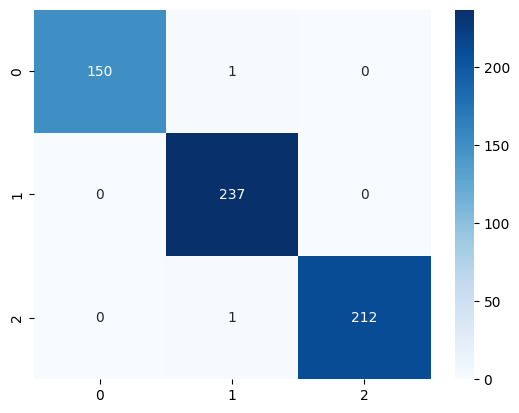

---------------------------------------------------
Random Forest: Cross Val Score = 1.00
Random Forest: F1 Score = 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



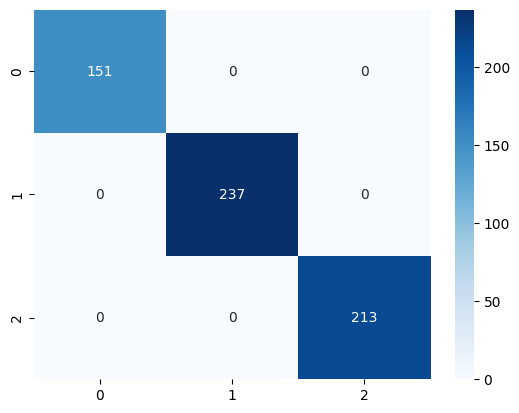

---------------------------------------------------
Gradient Boosting: Cross Val Score = 1.00
Gradient Boosting: F1 Score = 1.00
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



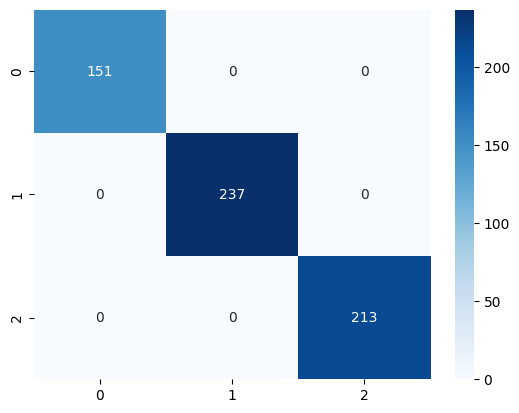

---------------------------------------------------
K-Nearest Neighbors: Cross Val Score = 1.00
K-Nearest Neighbors: F1 Score = 1.00
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



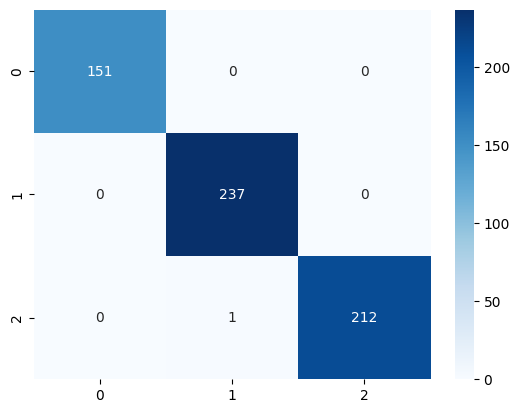

---------------------------------------------------
Support Vector Machine: Cross Val Score = 1.00
Support Vector Machine: F1 Score = 1.00
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       237
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



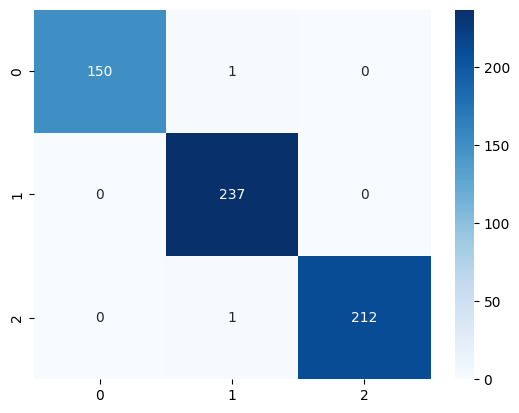

---------------------------------------------------
xgboost: Cross Val Score = 1.00
xgboost: F1 Score = 1.00
xgboost Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       151
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



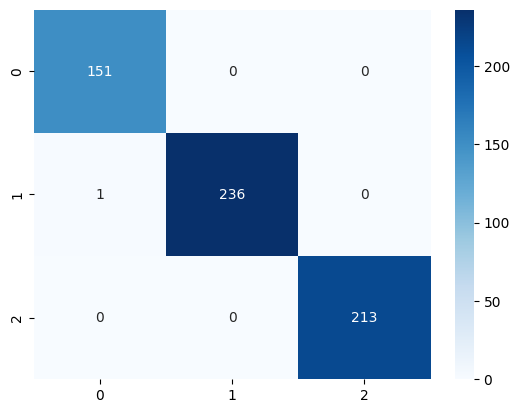

---------------------------------------------------


In [21]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f'{clf_name}: Cross Val Score = {cv_scores.mean():.2f}')
    print(f'{clf_name}: F1 Score = {f1:.2f}')
    print(f'{clf_name} Classification Report:\n{classification_report(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
    plt.show()
    print('---------------------------------------------------')